In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

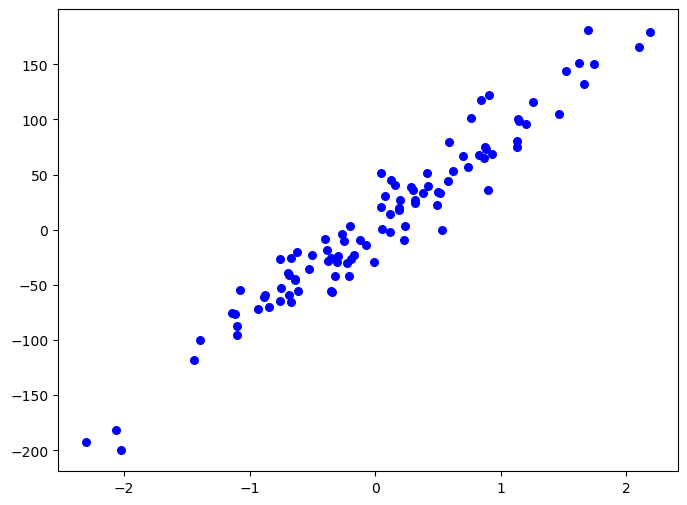

In [5]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

In [6]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [10]:
class LinearRegression:
    
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # init params
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            y_predicted = self.predict(X)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
   
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

In [12]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

print(mse(y_test, predicted))

242.6143166042288
